## Week 10- Riemann Sums
### Nandini Mahesh Bhat (nabh6611)

### Roadmap

I have completed the Activities in order. Activities 1, 2, and 4 require user input, including input for the selected function- to make it easier to test these out quickly, I have commented a sample function next to the function call that can be copy pasted into the input box. For the exercises in Activity 3, I have hard coded the various subintervals and functions required for each question as I figured it might be tedious for the user to repeatedly provide input for each one. Therefore, no input is required for the exercises.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def function_input():  #for user to enter function- used across multiple Activities
    
    func_input = input("Enter your formula here, in terms of x: ")
    return lambda x: eval(func_input)

### Activity 1: Coding RIEMANN

I made three separate functions for this question- one for evaluating the user's function input, one for calculating y values based on sum type (right, left, midpoint), and a main RIEMANN function that calls both of these to tie everything together. The main function has start and stop values as its parameters. The user can select which method to use by entering "r", "l", or "m", and whether they want graphics displayed along with the calculations (bars with sampling points marked based on method). They can then select the step size (also the number of bars, if applicable) and enter the function that Riemann sums will be calculated for.

In [3]:
def sum_type(start, stop, delta_x, func, sumtype):   #select sum type (right, left, midpoint)
    
    points_y = []
    points_x = []
    
    if sumtype == "r":
        for i in np.arange(start + delta_x, stop + delta_x, delta_x):
            points_y.append(func(i))
            points_x.append(i)
            
    elif sumtype == "l":
        for i in np.arange(start, stop, delta_x):
            points_y.append(func(i))
            points_x.append(i)
            
    else:
        start_val = 0
        end_val = 0
        for i in np.arange(start, stop, delta_x):
                start_val = i
                end_val = i + delta_x
                midpoint = (start_val + end_val) / 2
                points_y.append(func(midpoint))
                points_x.append(midpoint)
                
    return points_x, points_y     


def RIEMANN(start, stop):   #main function, user can select sum type, toggle graphics, select step size (number of bars), and function
    
    sumtype = input("Choose sum type- enter r for right, l for left, m for midpoint: ")
    toggle_graphics = int(input("Enter 1 for graphics and calculations, and 0 for just calculations with no graphics: "))
    num_bars = int(input("Enter the number of bars your graph should display (or step size, if not using graphics): "))
    
    delta_x = (stop - start) / num_bars
    func = function_input()
    
    time_steps = np.arange(start, stop, delta_x)              #time steps for graphing
    points_x, points_y = sum_type(start, stop, delta_x, func, sumtype)  #sampling points
    
    accumulation = 0
    x = start
    
    for point in points_y:
        
        delta_S = point * delta_x
        accumulation += delta_S
        
        print(f"Current x: {x} // Delta S: {delta_S} // Accumulation: {accumulation}")
        
        x += delta_x
        
    print(f"Final accumulation value: {accumulation}")   
    
    #if user has chosen to include graphics, bars for selected sum type and function will be graphed
    if toggle_graphics:
        
        if sumtype == "r":
            plt.bar(time_steps, points_y, label="Right Hand Sums", width=delta_x, color='green', edgecolor="black", alpha=0.5, align="edge")
            plt.scatter(points_x, points_y, label="Sampling Points")
        
        elif sumtype == "l":
            plt.bar(time_steps, points_y, label="Left Hand Sums", width=delta_x, color='green', edgecolor="black", alpha=0.5, align="edge")
            plt.scatter(points_x, points_y, label="Sampling Points")
            
        else:
            plt.bar(time_steps, points_y, label="Midpoint Sums", width=delta_x, color='green', edgecolor="black", alpha=0.5, align="edge")
            plt.scatter(points_x, points_y, label="Sampling Points")
            
        plt.title("Riemann Sums")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
        plt.show()


Choose sum type- enter r for right, l for left, m for midpoint:  l
Enter 1 for graphics and calculations, and 0 for just calculations with no graphics:  1
Enter the number of bars your graph should display (or step size, if not using graphics):  4
Enter your formula here, in terms of x:  np.sqrt(1+x**3)


Current x: 1 // Delta S: 0.7071067811865476 // Accumulation: 0.7071067811865476
Current x: 1.5 // Delta S: 1.0458250331675945 // Accumulation: 1.7529318143541421
Current x: 2.0 // Delta S: 1.5 // Accumulation: 3.252931814354142
Current x: 2.5 // Delta S: 2.038688303787511 // Accumulation: 5.291620118141653
Final accumulation value: 5.291620118141653


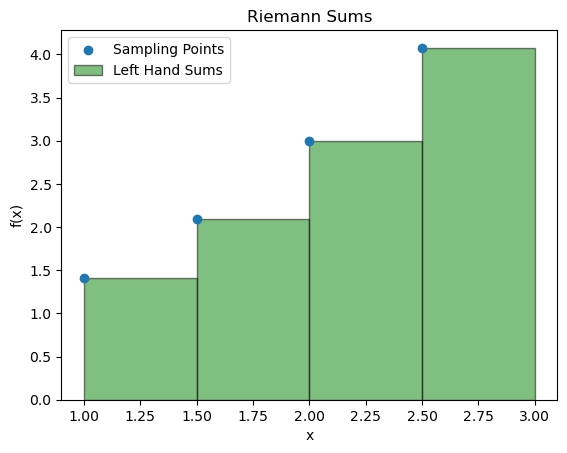

In [4]:
RIEMANN(1, 3) #np.sqrt(1+x**3)

### Activity 2: Riemann Hero Graphic!

I modified the initial RIEMANN function to calculate bar heights for all three sum types, instead of just one. The bars for each method are plotted on the same axes.

In [5]:
def sum_type_2(start, stop, delta_x, func):   #calculates all sum types
    
    points_y_r = []
    points_y_l = []
    points_y_m = []
    
    for i in np.arange(start + delta_x, stop + delta_x, delta_x):
        points_y_r.append(func(i))
            
    for i in np.arange(start, stop, delta_x):
        points_y_l.append(func(i))
            
    start_val = 0
    end_val = 0
    for i in np.arange(start, stop, delta_x):
            start_val = i
            end_val = i + delta_x
            midpoint = (start_val + end_val) / 2
            points_y_m.append(func(midpoint))
                
    return points_y_r, points_y_l, points_y_m   

def RIEMANN_GRAPHIC(start, stop):   
    
    num_bars = int(input("Enter the number of bars your graph should display (or step size, if not using graphics): "))
    
    delta_x = (stop - start) / num_bars
    func = function_input()
    
    time_steps = np.arange(start, stop, delta_x)              
    points_y_r, points_y_l, points_y_m = sum_type_2(start, stop, delta_x, func)  
    
    #graph bars for all three sum types
    plt.bar(time_steps, points_y_r, label="Right Hand Sums", width=delta_x, color='orange', edgecolor="black", alpha=0.5, align="edge")
    plt.bar(time_steps, points_y_l, label="Left Hand Sums", width=delta_x, color='blue', edgecolor="black", alpha=0.5, align="edge")
    plt.bar(time_steps, points_y_m, label="Midpoint Sums", width=delta_x, color='green', edgecolor="black", alpha=0.5, align="edge")
    
    x_func_line = np.linspace(start, stop, 700)
    y_func_line = func(x_func_line)
    plt.plot(x_func_line, y_func_line, label="Function Line", color="purple", linewidth= 2)

    plt.title("Riemann Hero Graphic")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()


Enter the number of bars your graph should display (or step size, if not using graphics):  4
Enter your formula here, in terms of x:  np.sqrt(1+x**3)


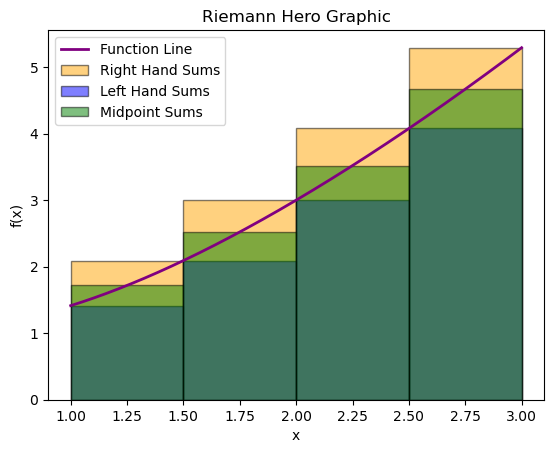

In [6]:
RIEMANN_GRAPHIC(1, 3) #np.sqrt(1+x**3)

### Activity 3: Exercises 4-12 with RIEMANN

In [7]:
#4a
def sum_type(start, stop, delta_x, func, sumtype): 
    
    points_y = []
    
    if sumtype == "r":
        for i in np.arange(start + delta_x, stop + delta_x, delta_x):
            points_y.append(func(i))
            
    elif sumtype == "l":
        for i in np.arange(start, stop, delta_x):
            points_y.append(func(i))
 
    else:
        start_val = 0
        end_val = 0
        for i in np.arange(start, stop, delta_x):
                start_val = i
                end_val = i + delta_x
                midpoint = (start_val + end_val) / 2
                points_y.append(func(midpoint))
                
    return points_y     


def RIEMANN_EXERCISES(start, stop, sumtype, num_bars, func):  
    
    for i in num_bars:
    
        delta_x = (stop - start) / i
        time_steps = np.arange(start, stop, delta_x)              
        points_y = sum_type(start, stop, delta_x, func, sumtype)  

        accumulation = 0
        x = start

        for point in points_y:   #calculates accumulation value, only outputs final accumulation
            
            point = float(point)
            delta_S = point * delta_x
            accumulation += delta_S
            x += delta_x

        print(f"Final accumulation value for {i} subintervals: {accumulation}")

In [8]:
def func_2(func):  #specific to these exercises
    return lambda x: eval(func)

### Q4

In [9]:
num_bars = [40, 400, 4000, 40000] 
function = "np.sqrt((1+x**3))"
func = func_2(function)

RIEMANN_EXERCISES(1, 3, "l", num_bars, func)

Final accumulation value for 40 subintervals: 6.133337696563017
Final accumulation value for 400 subintervals: 6.220269270650224
Final accumulation value for 4000 subintervals: 6.228990096672399
Final accumulation value for 40000 subintervals: 6.229862455976842


Q4a) Two decimal points in this sequence have stabilized, starting at 400 subintervals (6.22).

b) The limit of these left endpoint Riemann sums appears to be approaching 6.2299.

In [10]:
num_bars = [40, 400, 4000, 40000, 400000]
RIEMANN_EXERCISES(3, 7, "l", num_bars, func)

Final accumulation value for 40 subintervals: 45.15840131308283
Final accumulation value for 400 subintervals: 45.75374480731908
Final accumulation value for 4000 subintervals: 45.813383966325496
Final accumulation value for 40000 subintervals: 45.81934893039781
Final accumulation value for 400000 subintervals: 45.81994543740511


c) The limit being approached by these left endpoint Riemann sums is 45.820.

In [11]:
num_bars = [40, 400, 4000, 40000, 400000]
RIEMANN_EXERCISES(1, 7, "l", num_bars, func)

Final accumulation value for 40 subintervals: 50.77043536517244
Final accumulation value for 400 subintervals: 51.92152784413173
Final accumulation value for 4000 subintervals: 52.03712188035586
Final accumulation value for 40000 subintervals: 52.04868613248554
Final accumulation value for 400000 subintervals: 52.04984260652967


d) The limit being approached by these left endpoint Riemann sums appears to be reaching 52.050. The intervals in parts b and c combine to form the interval in d- likewise, the sum of their limits (6.2299 + 45.820) is the value of the limit in part d (52.0499, which rounds to 52.050).

### Q5

Q5) The function contains a feature for calculating midpoint sums- the user must enter "m" when asked which sum type they would like to use. When the sum_type function is called, it checks what letter the user has entered (an "l", "m", or "r") and calculates the heights of the bars (y values) accordingly. If the user has entered an "m", the function finds the midpoint of each interval. This is the x value to be substituted in the user-entered function, which gives us the y value at the midpoint.

### Q6

In [12]:
num_bars = [40, 400, 4000, 40000]
RIEMANN_EXERCISES(1, 3, "m", num_bars, func)

Final accumulation value for 40 subintervals: 6.22980412273429
Final accumulation value for 400 subintervals: 6.229957835175769
Final accumulation value for 4000 subintervals: 6.229959372356092
Final accumulation value for 40000 subintervals: 6.229959387737616


Q6a) Six decimal points in this sequence have stabilized, starting from 4000 subintervals (6.229959).

b) Around 400 subintervals are required to stabilize the value to 4 decimal points (6.2299). This is the same limiting value found when calculating Riemann sums over the same interval, using the left endpoint method.

c) It seems as though using midpoint sums is more efficient than using left endpoint sums for this specific function. Using midpoint sums required using only 2 steps (40 and 400) to reach the limiting value, while it took 4 steps (40, 400, 4000, and 40000) to approach the limiting value using the left endpoint method, in addition to rounding it off manually.

### Q7

In [13]:
num_bars = [40, 400, 4000, 40000]
RIEMANN_EXERCISES(1, 3, "r", num_bars, func)

Final accumulation value for 40 subintervals: 6.327202149550822
Final accumulation value for 400 subintervals: 6.239655715949005
Final accumulation value for 4000 subintervals: 6.230928741202276
Final accumulation value for 40000 subintervals: 6.2300563204298305


Q7a) The function contains a feature for calculating right endpoint sums- the user must enter "r" when asked which sum type they would like to use. It is similar to the way the midpoint sums are calculated, but instead of taking the midpoints of intervals, the values at rightmost end of each interval are taken. These are once again the x values used to calculate the y values at these points.

b) With right endpoint Riemann sums, the resulting values have stabilized up to 3 decimal places (6.230 at 4000 subintervals). It is slightly more efficient than left endpoint sums when it comes to this specific function, as it stabilized to more decimal points quicker (in the left Riemann sums, the resulting value had not yet stabilized to 3 decimal points at 4000 subintervals).

### Q8

In [14]:
num_bars = [20, 50]
function = "np.sqrt((1-x**2))"
func = func_2(function)
RIEMANN_EXERCISES(-1, 1, "l", num_bars, func)

Final accumulation value for 20 subintervals: 1.5522591631241596
Final accumulation value for 50 subintervals: 1.5660981554514968


Q8) The values obtained are the same as the estimates given, with the estimates being rounded.

### Q9

In [15]:
num_bars = [4, 20]
function = "np.sqrt(1+np.cos(x)**2)"
func = func_2(function)
RIEMANN_EXERCISES(0, np.pi, "l", num_bars, func)

Final accumulation value for 4 subintervals: 3.819943643179836
Final accumulation value for 20 subintervals: 3.820197789027712


Q9a) The values obtained are the same as the estimates given (with some difference in rounding).

In [16]:
num_bars = [40, 400, 4000, 40000]
RIEMANN_EXERCISES(0, np.pi, "l", num_bars, func)

Final accumulation value for 40 subintervals: 3.8201977890277132
Final accumulation value for 400 subintervals: 3.820197789027713
Final accumulation value for 4000 subintervals: 3.8201977890277163
Final accumulation value for 40000 subintervals: 3.8201977890277052


b) The limiting value of the left endpoint Riemann sums becomes 3.82019778903 (to 11 decimal places) as the number of intervals increases.

### Q10

Q10) Results for this question are below:

In [17]:
num_bars = [100, 1000, 10000]
function = "np.cos(x**2)"
func = func_2(function)
RIEMANN_EXERCISES(0, 4, "l", num_bars, func)

Final accumulation value for 100 subintervals: 0.6339209745734846
Final accumulation value for 1000 subintervals: 0.5983787174632481
Final accumulation value for 10000 subintervals: 0.5948518901035781


### Q11

In [18]:
num_bars = [10, 100, 1000]
function = "(np.cos(x))/(1+x**2)"
func = func_2(function)
RIEMANN_EXERCISES(2, 3, "l", num_bars, func)

Final accumulation value for 10 subintervals: -0.10320774749944361
Final accumulation value for 100 subintervals: -0.10404981921880206
Final accumulation value for 1000 subintervals: -0.10412210833479739


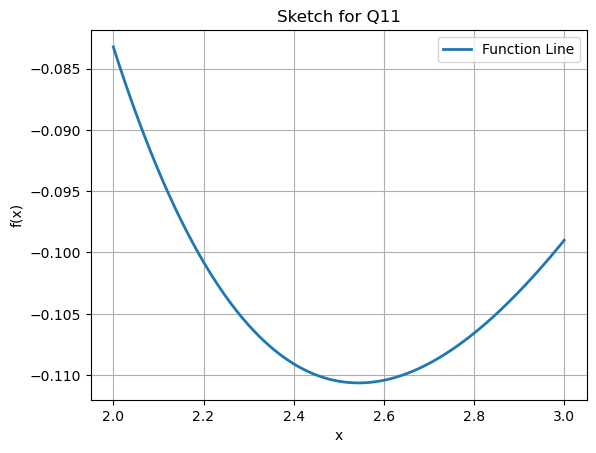

In [19]:
def draw_func(start, stop, step, func):
    
    x_func_line = np.linspace(start, stop, step)
    y_func_line = func(x_func_line)
    plt.plot(x_func_line, y_func_line, label="Function Line", linewidth= 2)
    
    plt.title("Sketch for Q11")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()
    
draw_func(2, 3, 1000, func)

Q11) From the sketch of the function, we can tell that its y values are all negative (at least over this interval). Therefore, calculating Riemann sums for these values would result in negative values (as multiplying a negative number by the positive delta x would result in another negative number- this would also mean that the resulting values would all be subtracted from each other, rather than added).

### Q12

In [20]:
num_bars = [10, 100, 1000]
function = "x**3"
func = func_2(function)
RIEMANN_EXERCISES(-2, 2, "m", num_bars, func)

Final accumulation value for 10 subintervals: -7.549516567451064e-15
Final accumulation value for 100 subintervals: 3.064215547965432e-14
Final accumulation value for 1000 subintervals: 2.9427849046470556e-14


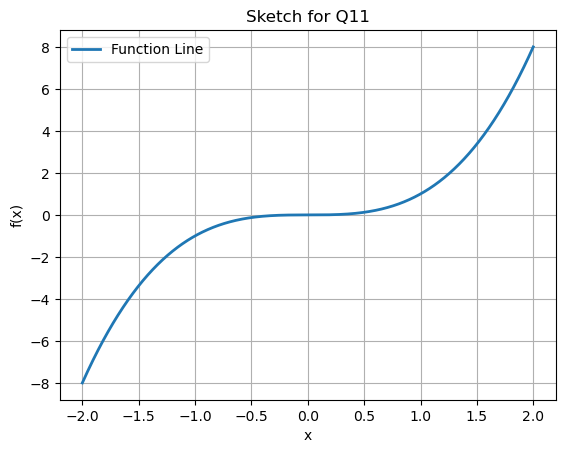

In [21]:
draw_func(-2, 2, 1000, func)

Q12a) From the results, we can tell that the Riemann sums are 0 (with a nonzero digit in the 15th decimal place for 10 subintervals, and a nonzero digit in the 14th decimal place for 100 and 1000 subintervals). After drawing the sketch of the graph, it seems as though values calculated for each height in the negative region of the graph will eventually be brought back to 0 when the final sum is calculated- this is because of values calculated in the positive region of the graph. For example, when x = -1, y = -1^3, which is -1. When x = 1, y = 1^3, which is 1. As -1 + 1 = 0, there is no increase or decrease in the sum, and this happens for all the other calculated y values as well.

In [22]:
RIEMANN_EXERCISES(-2, 2, "l", num_bars, func)

Final accumulation value for 10 subintervals: -3.200000000000006
Final accumulation value for 100 subintervals: -0.319999999999975
Final accumulation value for 1000 subintervals: -0.03199999999997415


b) When I use left endpoint sums, the resulting value for 10 subintervals is not 0, and the resulting values for 100 and 1000 subintervals are close to 0, but not as close as when using midpoint sums. This could be because left endpoint sums use only the left end of each interval- for example, x = -2 on the graph above. Because only left endpoints are used, the point x = 2 is not used (as it is a right endpoint). This leaves one value that is not brought back to zero, which brings the final Riemann sum below/above 0. With midpoint sums, you will get an opposing value for each y value. Something similar happens if you try this with right endpoint Riemann sums, as one value on the right is not calculated:

In [23]:
RIEMANN_EXERCISES(-2, 2, "r", num_bars, func)

Final accumulation value for 10 subintervals: 3.1999999999999904
Final accumulation value for 100 subintervals: 0.3200000000000288
Final accumulation value for 1000 subintervals: 0.03200000000002643


As can be seen, the results for the right endpoint sums are similar to the results for the left endpoint sums (but leaning positive rather than negative).

### Summary

From the exercises, it seems as though midpoint sums are the most efficient method for calculating Riemann sums- however, the process of calculating them will take much longer by hand than simply using left or right endpoint sums (even the code written for them was more complex). Left and right Riemann sums are easier to calculate, but seem to be a little higher or lower than the midpoint result depending on the function. For example, in Exercise 12, using midpoint sums gave us an accurate estimate of 0 (with room for floating point errors), given the nature of the function x^3. Using left endpoint sums resulted in values less than 0, while right endpoint sums resulted in values greater than 0. When using only a small number of steps (number of bars), it might be best to use midpoint sums- however, with a very large number of bars the difference between results may not be as significant. In these situations it may be more convenient to use left or right endpoint sums, as they allow us to use their "readymade" x values determined by either the start or end of the interval.

### Activity 4: Simpson's Rule

The code for Riemann Sums with the Simpson's rule requires the sum_type_2 method that was used for the Hero Graphic in Activity 2, as it allows us to calculate y values for each sum type. After obtaining these, final Riemann sums are calculated for each of the three methods. These are then used to find the final Riemann sum using Simpson's Rule, which combines the midpoint and trapezoid method (the latter of which is the average of the left and right midpoint sums).

In [24]:
def sum_type_2(start, stop, delta_x, func):   #calculates all sum types
    
    points_y_r = []
    points_y_l = []
    points_y_m = []
    
    for i in np.arange(start + delta_x, stop + delta_x, delta_x):
        points_y_r.append(func(i))
            
    for i in np.arange(start, stop, delta_x):
        points_y_l.append(func(i))
            
    start_val = 0
    end_val = 0
    for i in np.arange(start, stop, delta_x):
            start_val = i
            end_val = i + delta_x
            midpoint = (start_val + end_val) / 2
            points_y_m.append(func(midpoint))
                
    return points_y_r, points_y_l, points_y_m   

def RIEMANN_SIMPSON(start, stop):  
    
    num_bars = int(input("Enter the number of bars your graph should display (or step size, if not using graphics): "))
    
    delta_x = (stop - start) / num_bars
    func = function_input()
    
    time_steps = np.arange(start, stop, delta_x)              
    
    points_y_r, points_y_l, points_y_m = sum_type_2(start, stop, delta_x, func)  
    
    accumulation_r = 0
    accumulation_l = 0
    accumulation_m = 0
    
    for point in points_y_r:   #sum for right midpoint
        
        delta_S = point * delta_x
        accumulation_r += delta_S  
    
    for point in points_y_l:   #sum for left midpoint
        
        delta_S = point * delta_x
        accumulation_l += delta_S
    
    for point in points_y_m:   #sum for midpoint
        
        delta_S = point * delta_x
        accumulation_m += delta_S
        
    riemann_sum = (1/6) * ((4 * accumulation_m) + accumulation_l + accumulation_r)   #formula for Simpson's Method
    print(accumulation_m)
    print(f"Riemann Sum with Simpson's Rule: {riemann_sum}")
    
    
    

In [25]:
RIEMANN_SIMPSON(1, 3) #np.sqrt(1+x**3)

Enter the number of bars your graph should display (or step size, if not using graphics):  4
Enter your formula here, in terms of x:  np.sqrt(1+x**3)


6.2144951600826985
Riemann Sum with Simpson's Rule: 6.229977567748691


Something very interesting I noticed about Simpson's Rule is that it is far more efficient than even midpoint sums. In Exercise 3, when calculating the midpoint Riemann Sum over the interval 1 to 3 (for the function (1+x^3)^0.5) it took 400 subintervals to stabilize the value at 6.2299. With Simpson's Rule, this was done in 4 subintervals. I realized that the method used may not matter all that much with a very large number of intervals, but using techniques such as this one allows you to both save time and make your program more efficient by reducing the number of subintervals you have to use. It would also make calculating by hand a lot easier- performing the calculations with the formula might be slightly more time consuming, but this is negated by the small number of calculations you have to do in the first place. 

This is because Simpson's rule takes both the midpoint and trapezoid sum methods and combines them in a way that negates the trapezoid method's increased error (which is its main flaw when compared to the midpoint method). As the error of the midpoint method is around half of the trapezoid method's error, multiplying it by 2 removes most of the error. The sum (2 * midpoint sum) + trapezoid sum gives you the integral * 3, so dividing it by 3 will result in the actual integral. The method used to calculate the trapezoid sum is the average of the left and right sums- Therefore, in a way, Simpson's rule allows us to use all the methods we have to obtain an incredibly accurate Riemann sum. This goes to show that while some methods may not be efficient, they can be combined with others to improve efficiency even beyond methods like the midpoint sum.